# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [14]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']
print('Male: ', male_df.agg(['mean', 'std']))
print('Female: ', female_df.agg(['mean', 'std']))
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male:           Height      Weight
mean  69.026346  187.020621
std    2.863362   19.781155
Female:           Height      Weight
mean  63.708774  135.860093
std    2.696284   19.022468


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

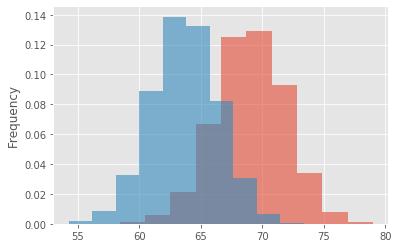

In [19]:
male_df['Height'].plot.hist(density=True, alpha=.6)
female_df['Height'].plot.hist(density=True, alpha=.6)

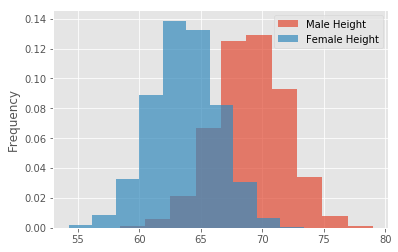

In [17]:
# Your code here

In [20]:
# Record your observations - are these inline with your personal observations?
# yes

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

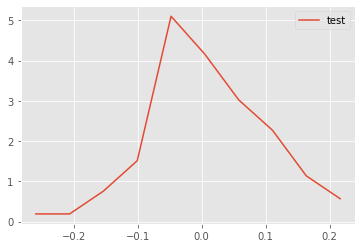

In [36]:
def density(x):
    x, y = np.histogram(x, density=True)
    
    # Initialize numpy arrays according to number of bins with zeros to store interpolated values
    pdfx = np.zeros(x.size)
    pdfy = np.zeros(x.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(x.size):
        pdfx[k] = 0.5*(y[k]+y[k+1])
        pdfy[k] = x[k]
        
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)



plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

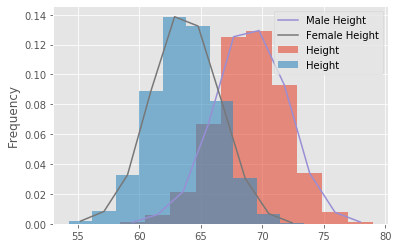

In [39]:
# Your code here 
male_df['Height'].plot.hist(density=True, alpha=.6)
female_df['Height'].plot.hist(density=True, alpha=.6)
male_x, male_y = density(male_df['Height'])
female_x, female_y = density(female_df['Height'])
plt.plot(male_x, male_y, label = 'Male Height')
plt.plot(female_x, female_y, label = 'Female Height')
plt.legend()

## Repeat the above exercise for male and female weights

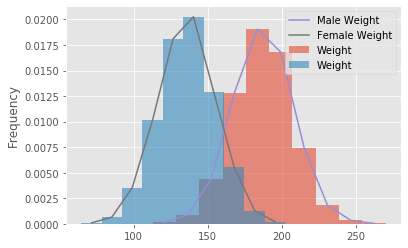

In [40]:
# Your code here 
male_df['Weight'].plot.hist(density=True, alpha=.6)
female_df['Weight'].plot.hist(density=True, alpha=.6)
male_x, male_y = density(male_df['Weight'])
female_x, female_y = density(female_df['Weight'])
plt.plot(male_x, male_y, label = 'Male Weight')
plt.plot(female_x, female_y, label = 'Female Weight')
plt.legend()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

In [41]:
import seaborn as sns

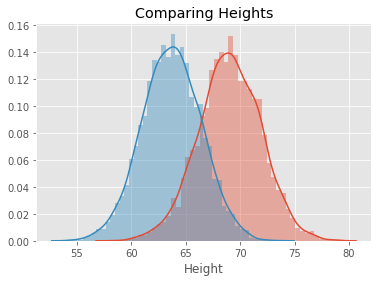

In [44]:
# Code for heights here
sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])
plt.title("Comparing Heights");

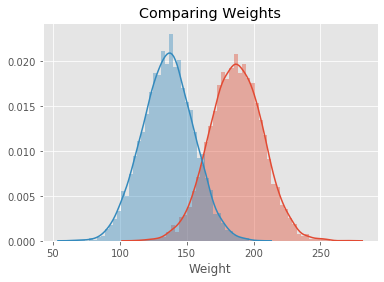

In [45]:
# Code for weights here
sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])
plt.title("Comparing Weights");

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.